In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Load the dataset
data = pd.read_csv('/content/Copy of student-mat.csv', sep=';')

In [4]:
# 1. Dataset Description
print("="*50)
print("1. DATASET DESCRIPTION")
print("="*50)
print("\nDataset Shape:", data.shape)
print("\nFirst 5 Rows:")
print(data.head())
print("\nData Types:")
print(data.dtypes)
print("\nMissing Values:")
print(data.isnull().sum())
print("\nData Description (Numerical Features):")
print(data.describe())

1. DATASET DESCRIPTION

Dataset Shape: (395, 33)

First 5 Rows:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Data Types:
school     


2. CORRELATION ANALYSIS


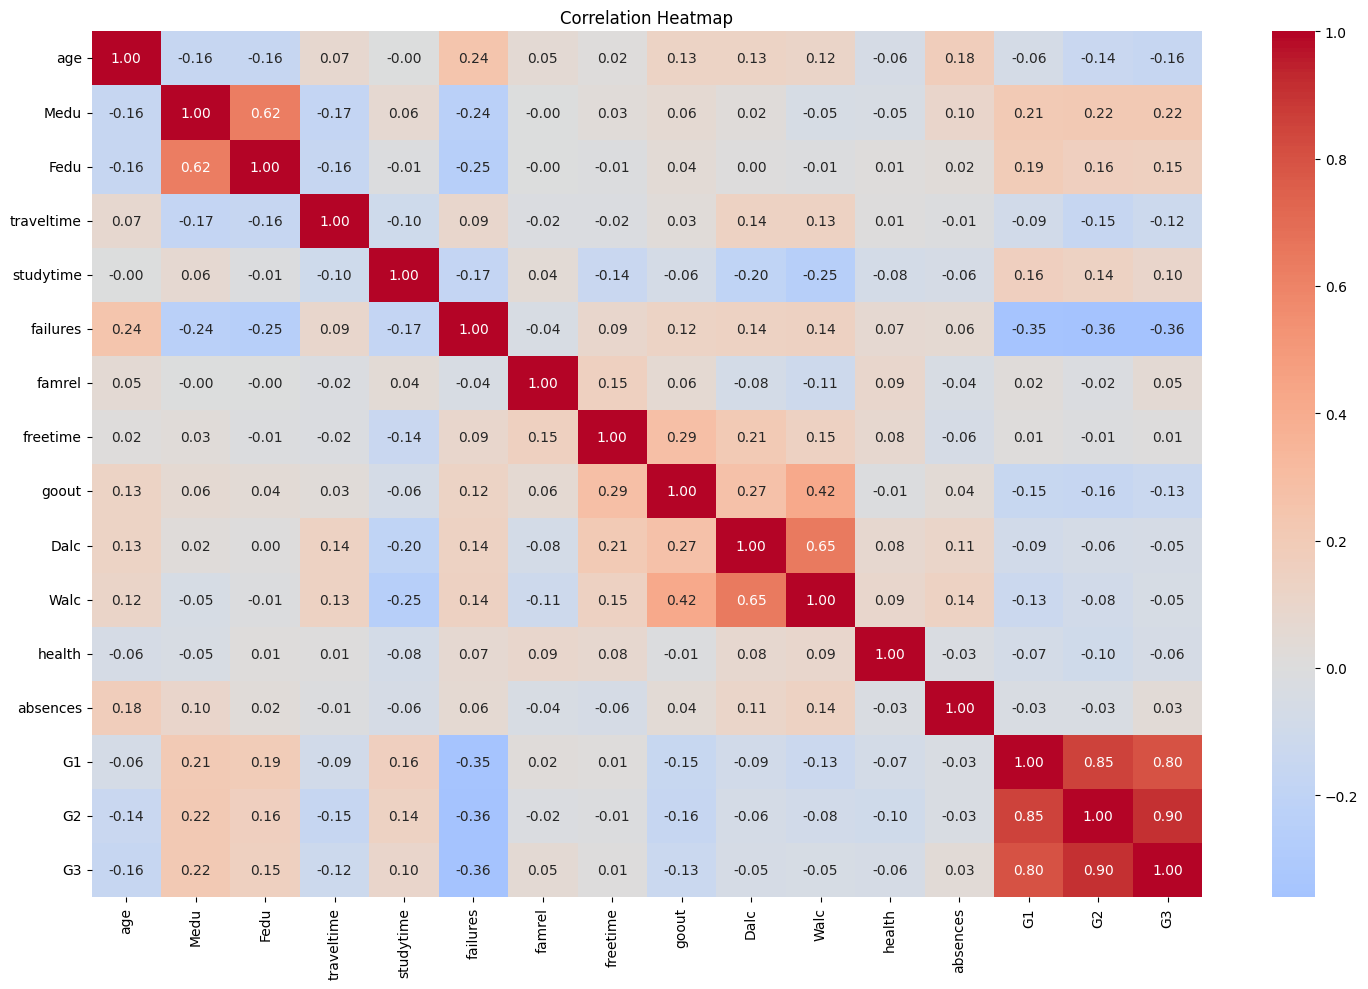

In [5]:
# 2. Correlation Analysis
print("\n" + "="*50)
print("2. CORRELATION ANALYSIS")
print("="*50)

plt.figure(figsize=(15, 10))
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [6]:
# Top correlations with G3
print("\nTop 10 features correlated with G3:")
corr_with_g3 = corr_matrix['G3'].sort_values(ascending=False)
print(corr_with_g3.head(10))


Top 10 features correlated with G3:
G3           1.000000
G2           0.904868
G1           0.801468
Medu         0.217147
Fedu         0.152457
studytime    0.097820
famrel       0.051363
absences     0.034247
freetime     0.011307
Walc        -0.051939
Name: G3, dtype: float64



3. EXPLORATORY DATA ANALYSIS


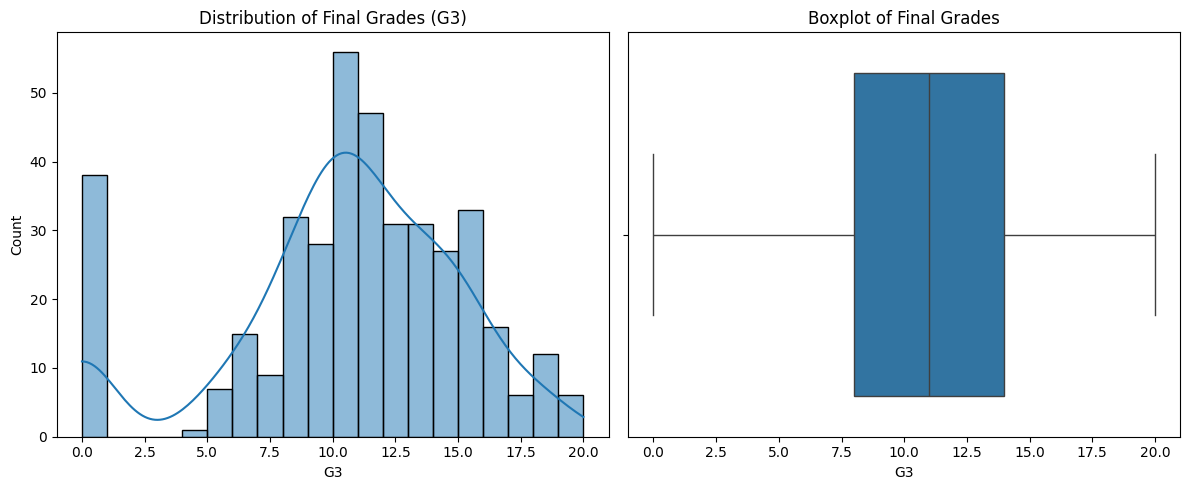

In [36]:
# 3. Exploratory Data Analysis
print("\n" + "="*50)
print("3. EXPLORATORY DATA ANALYSIS")
print("="*50)

# 3.1.1 Target Variable Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['G3'], bins=20, kde=True)
plt.title("Distribution of Final Grades (G3)")

# 3.1.2 Target Variable Distribution
plt.subplot(1, 2, 2)
sns.boxplot(x=data['G3'])
plt.title("Boxplot of Final Grades")
plt.tight_layout()
plt.show()

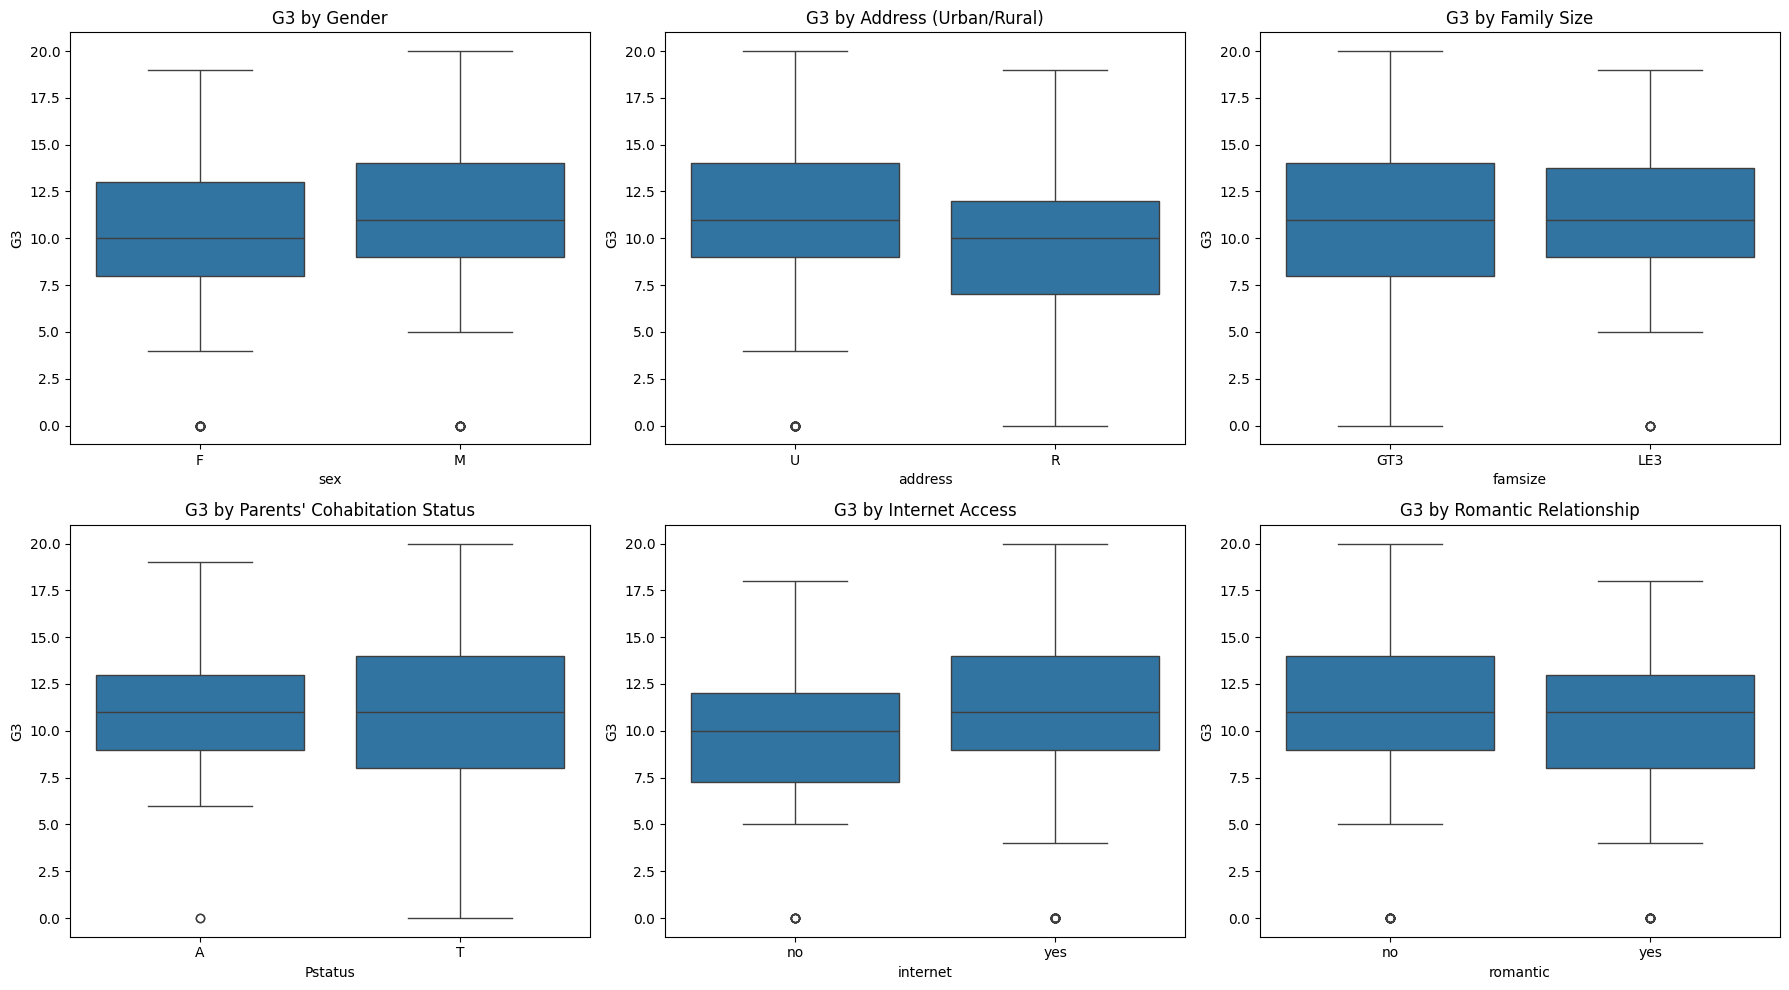

In [39]:
# 3.2.1 Categorical Features vs G3
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='sex', y='G3', data=data)
plt.title("G3 by Gender")

# 3.2.2 Categorical Features vs G3
plt.subplot(2, 3, 2)
sns.boxplot(x='address', y='G3', data=data)
plt.title("G3 by Address (Urban/Rural)")

# 3.2.3 Categorical Features vs G3
plt.subplot(2, 3, 3)
sns.boxplot(x='famsize', y='G3', data=data)
plt.title("G3 by Family Size")

# 3.2.4 Categorical Features vs G3
plt.subplot(2, 3, 4)
sns.boxplot(x='Pstatus', y='G3', data=data)
plt.title("G3 by Parents' Cohabitation Status")

# 3.2.5 Categorical Features vs G3
plt.subplot(2, 3, 5)
sns.boxplot(x='internet', y='G3', data=data)
plt.title("G3 by Internet Access")

# 3.2.6 Categorical Features vs G3
plt.subplot(2, 3, 6)
sns.boxplot(x='romantic', y='G3', data=data)
plt.title("G3 by Romantic Relationship")
plt.tight_layout()
plt.show()

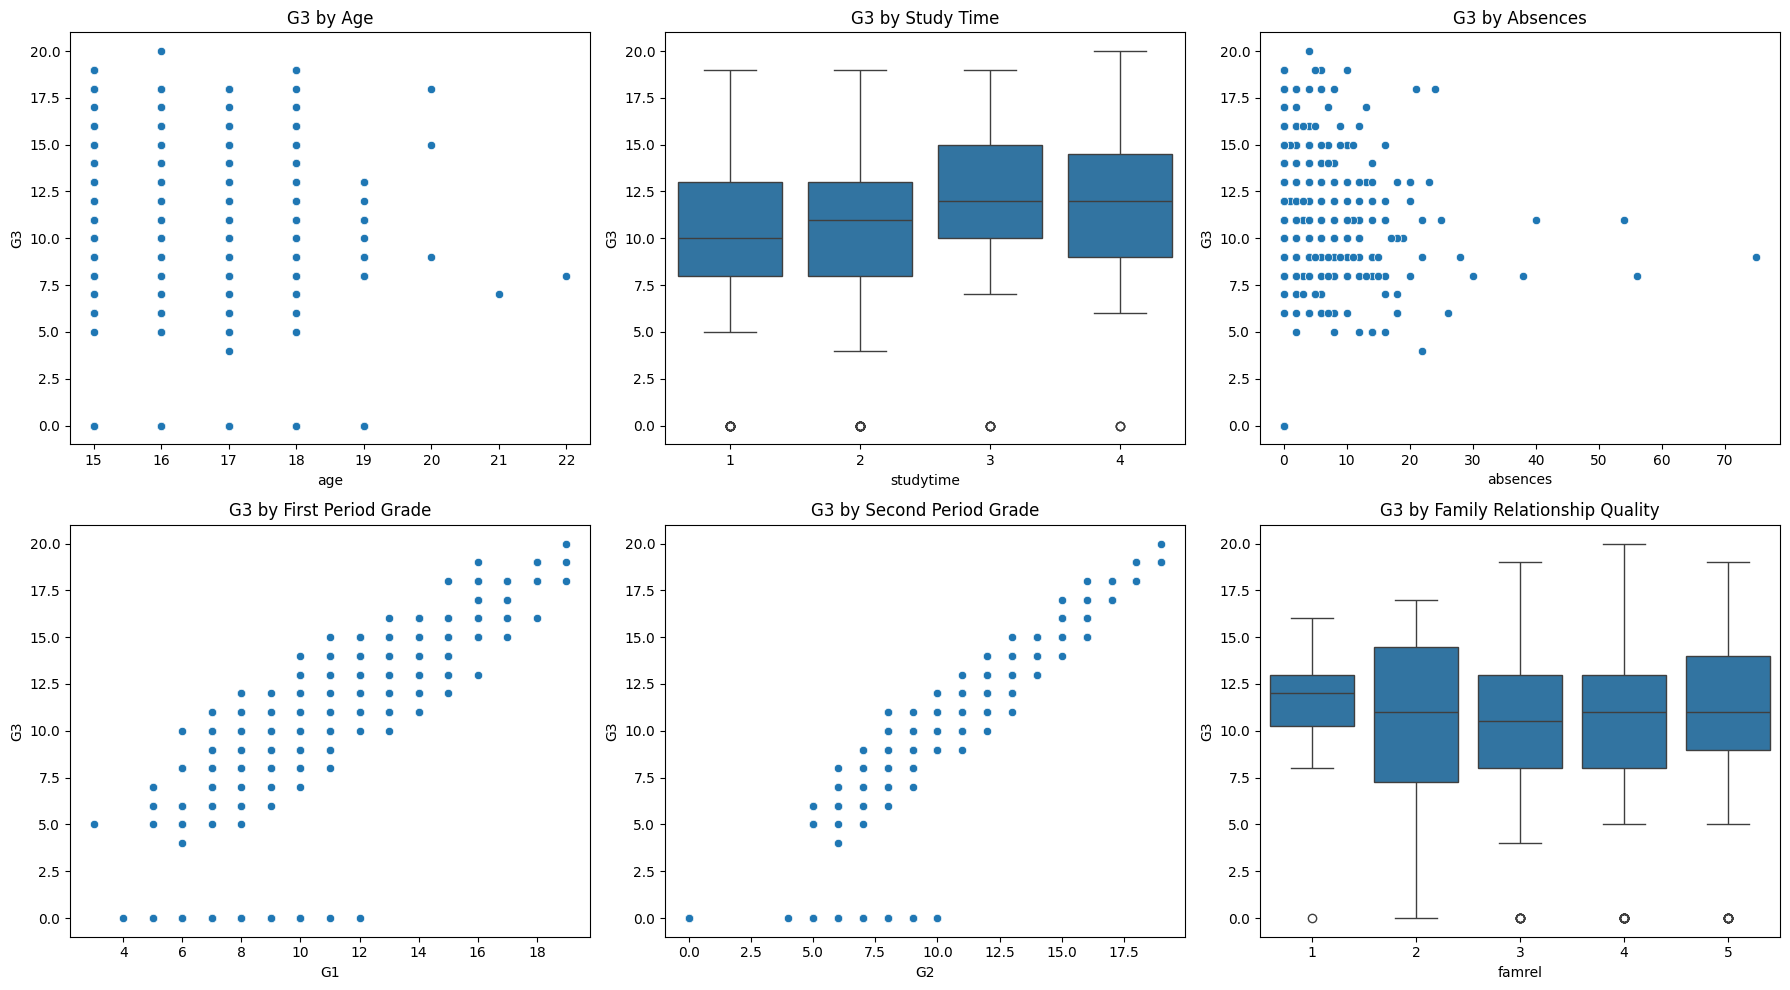

In [35]:
# 3.3.1 Numerical Features vs G3
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='age', y='G3', data=data)
plt.title("G3 by Age")

# 3.3.2 Numerical Features vs G3
plt.subplot(2, 3, 2)
sns.boxplot(x='studytime', y='G3', data=data)
plt.title("G3 by Study Time")

# 3.3.3 Numerical Features vs G3
plt.subplot(2, 3, 3)
sns.scatterplot(x='absences', y='G3', data=data)
plt.title("G3 by Absences")

# 3.3.4 Numerical Features vs G3
plt.subplot(2, 3, 4)
sns.scatterplot(x='G1', y='G3', data=data)
plt.title("G3 by First Period Grade")

# 3.3.5 Numerical Features vs G3
plt.subplot(2, 3, 5)
sns.scatterplot(x='G2', y='G3', data=data)
plt.title("G3 by Second Period Grade")

# 3.3.6 Numerical Features vs G3
plt.subplot(2, 3, 6)
sns.boxplot(x='famrel', y='G3', data=data)
plt.title("G3 by Family Relationship Quality")
plt.tight_layout()
plt.show()

In [22]:
# 4. Data Preprocessing
print("\n" + "="*50)
print("4. DATA PREPROCESSING")
print("="*50)

# Separate features and target
X = data.drop('G3', axis=1)
y = data['G3']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Features:", list(categorical_cols))
print("\nNumerical Features:", list(numeric_cols))

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=pd.cut(y, bins=5))

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


4. DATA PREPROCESSING

Categorical Features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Numerical Features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

Training set size: 276 samples
Test set size: 119 samples



5. MODEL TRAINING

Training Linear Regression...

Training Decision Tree...

Training Neural Network...

6. MODEL EVALUATION

Model Performance:
Linear Regression - R2 Score: 0.764, MSE: 4.923
Decision Tree - R2 Score: 0.775, MSE: 4.690
Neural Network - R2 Score: 0.766, MSE: 4.888


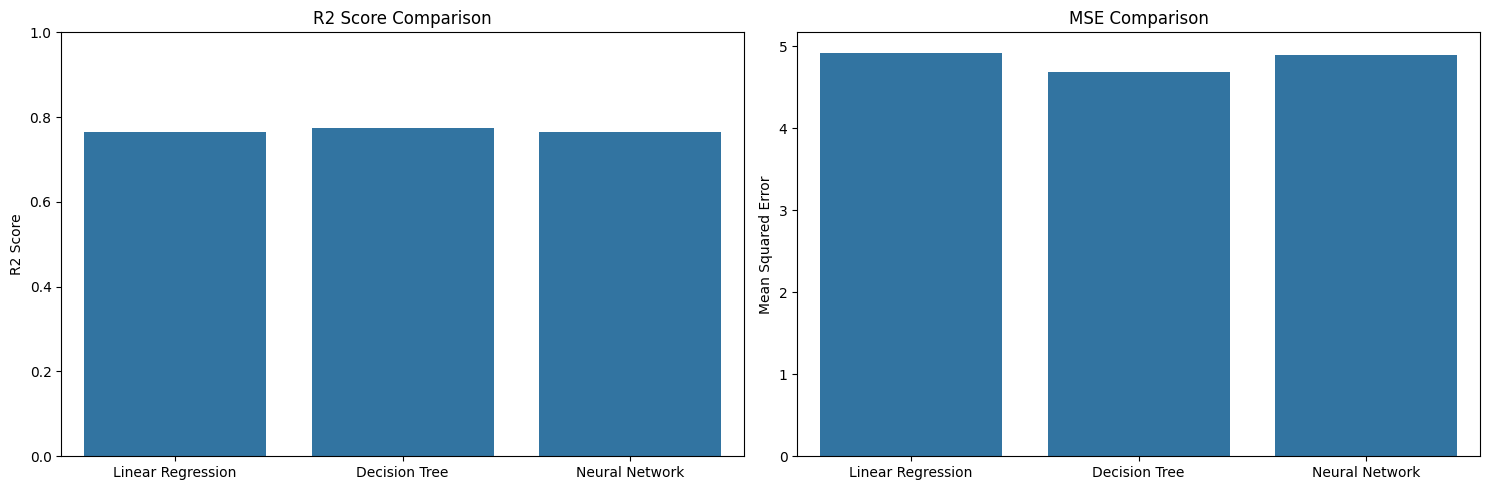

In [40]:
# 5. Model Training
print("\n" + "="*50)
print("5. MODEL TRAINING")
print("="*50)

# Linear Regression
print("\nTraining Linear Regression...")
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Decision Tree
print("\nTraining Decision Tree...")
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_params = {
    'regressor__max_depth': [3, 5, 7, None],
    'regressor__min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring='r2')
dt_grid.fit(X_train, y_train)
y_pred_dt = dt_grid.predict(X_test)

# Neural Network
print("\nTraining Neural Network...")
nn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(
        random_state=42,
        max_iter=5000,
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=20,
        learning_rate='adaptive',
        activation='tanh',
        solver='adam',
        verbose=False
    ))
])

nn_params = {
    'regressor__hidden_layer_sizes': [(50,), (100,), (50, 30)],
    'regressor__alpha': [0.0001, 0.001],
    'regressor__learning_rate_init': [0.001]
}

nn_grid = GridSearchCV(nn_pipeline, nn_params, cv=5, scoring='r2')
nn_grid.fit(X_train, y_train)
y_pred_nn = nn_grid.predict(X_test)

# 6. Model Evaluation
print("\n" + "="*50)
print("6. MODEL EVALUATION")
print("="*50)

def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{name} - R2 Score: {r2:.3f}, MSE: {mse:.3f}")
    return r2, mse

print("\nModel Performance:")
lr_r2, lr_mse = evaluate_model("Linear Regression", y_test, y_pred_lr)
dt_r2, dt_mse = evaluate_model("Decision Tree", y_test, y_pred_dt)
nn_r2, nn_mse = evaluate_model("Neural Network", y_test, y_pred_nn)

# Results Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=['Linear Regression', 'Decision Tree', 'Neural Network'],
            y=[lr_r2, dt_r2, nn_r2])
plt.title("R2 Score Comparison")
plt.ylim(0, 1)
plt.ylabel("R2 Score")

plt.subplot(1, 2, 2)
sns.barplot(x=['Linear Regression', 'Decision Tree', 'Neural Network'],
            y=[lr_mse, dt_mse, nn_mse])
plt.title("MSE Comparison")
plt.ylabel("Mean Squared Error")

plt.tight_layout()
plt.show()

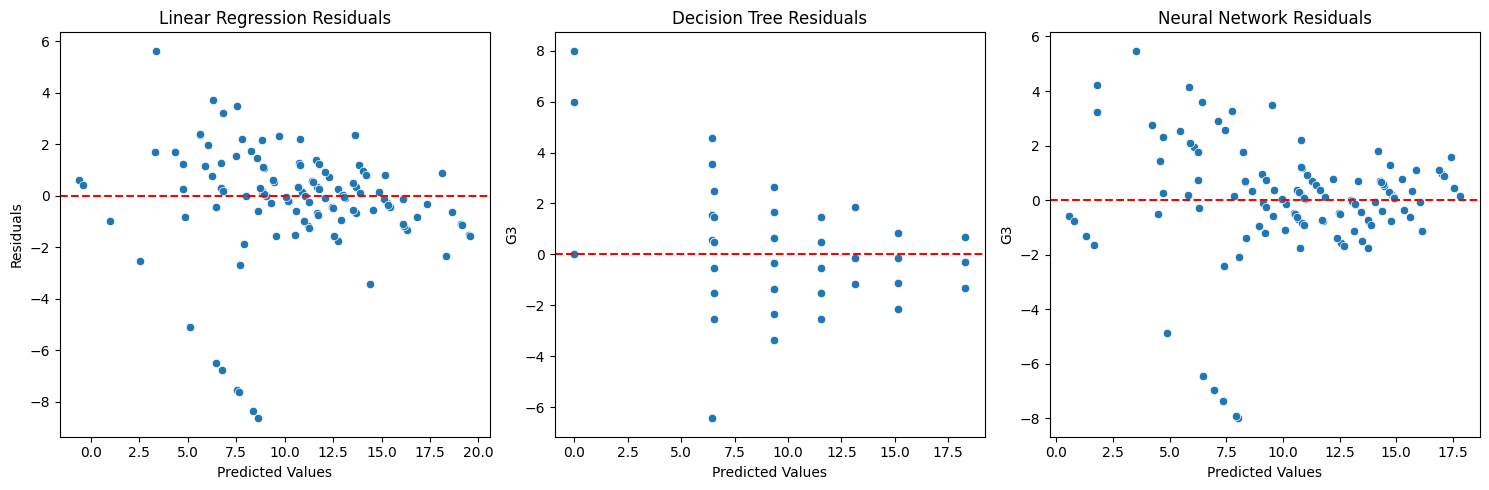

In [31]:
# Residual Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
residuals_lr = y_test - y_pred_lr
sns.scatterplot(x=y_pred_lr, y=residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Linear Regression Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.subplot(1, 3, 2)
residuals_dt = y_test - y_pred_dt
sns.scatterplot(x=y_pred_dt, y=residuals_dt)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Decision Tree Residuals")
plt.xlabel("Predicted Values")


plt.subplot(1, 3, 3)
residuals_nn = y_test - y_pred_nn
sns.scatterplot(x=y_pred_nn, y=residuals_nn)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Neural Network Residuals")
plt.xlabel("Predicted Values")

plt.tight_layout()
plt.show()

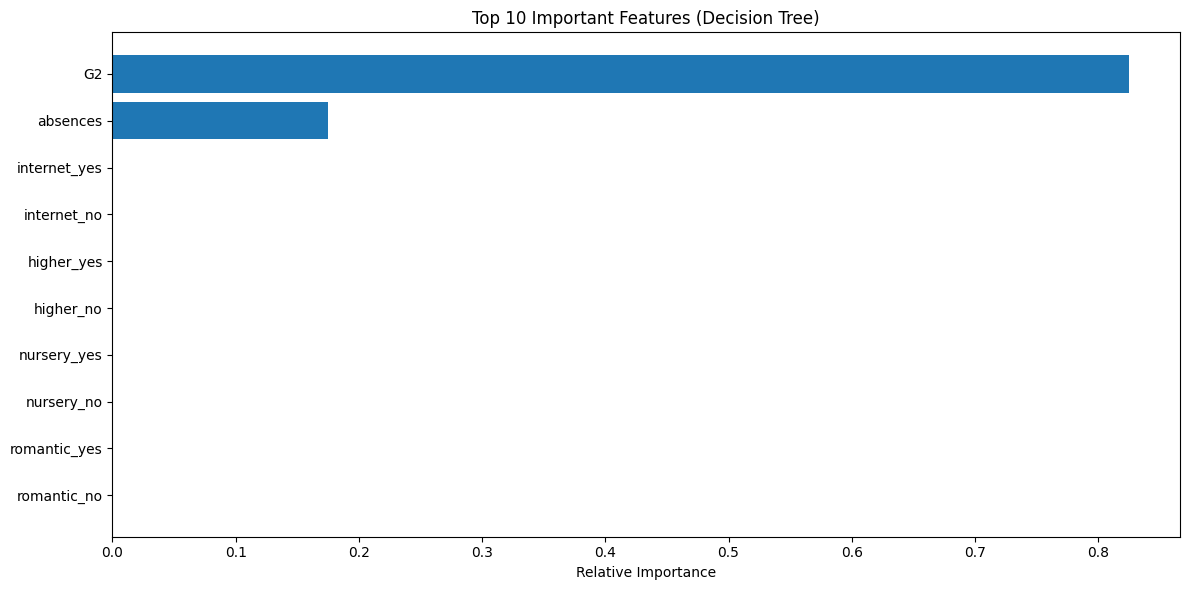

In [41]:
# Feature Importance (Decision Tree)
best_dt = dt_grid.best_estimator_.named_steps['regressor']

if hasattr(best_dt, 'feature_importances_'):
    # Get feature names after one-hot encoding
    ohe = dt_grid.best_estimator_.named_steps['preprocessor'].named_transformers_['cat']
    cat_features = ohe.get_feature_names_out(categorical_cols)
    all_features = np.concatenate([numeric_cols, cat_features])

    # Get importance scores
    importances = best_dt.feature_importances_
    indices = np.argsort(importances)[-10:]  # Top 10 features

    plt.figure(figsize=(12, 6))
    plt.title("Top 10 Important Features (Decision Tree)")
    plt.barh(range(10), importances[indices], align='center')
    plt.yticks(range(10), [all_features[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.tight_layout()
    plt.show()

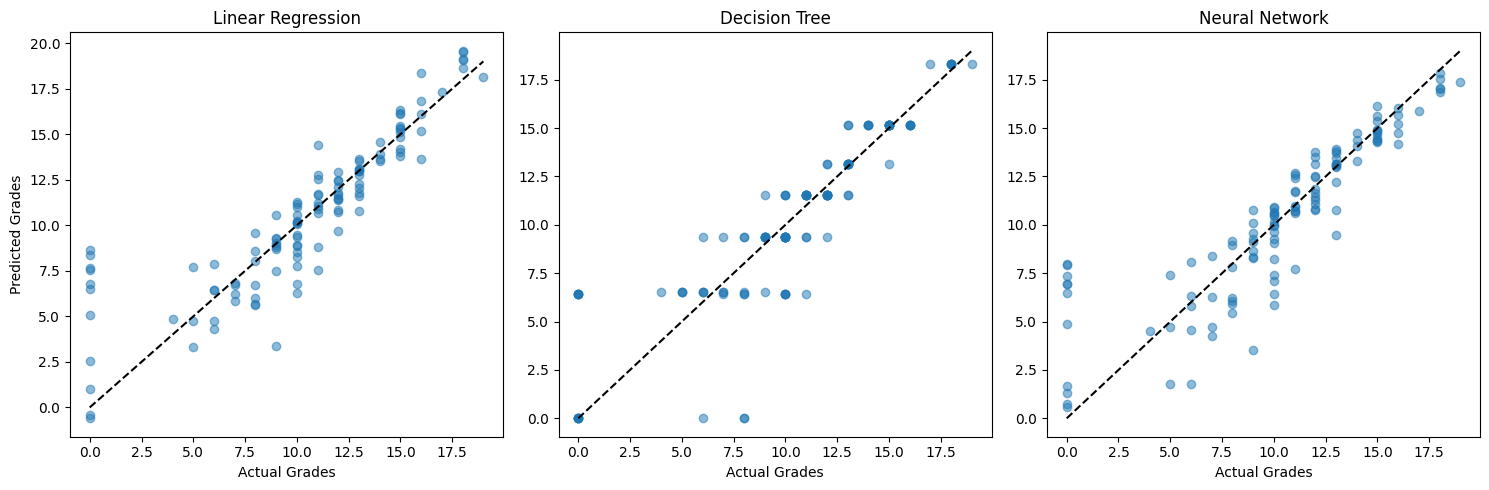

In [42]:
# Actual vs Predicted Values
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Linear Regression")

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Grades")
plt.title("Decision Tree")

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Grades")
plt.title("Neural Network")

plt.tight_layout()
plt.show()

In [43]:
# Best Parameters
print("\nBest Decision Tree Parameters:")
print(dt_grid.best_params_)

print("\nBest Neural Network Parameters:")
print(nn_grid.best_params_)


Best Decision Tree Parameters:
{'regressor__max_depth': 3, 'regressor__min_samples_split': 2}

Best Neural Network Parameters:
{'regressor__alpha': 0.001, 'regressor__hidden_layer_sizes': (100,), 'regressor__learning_rate_init': 0.001}
